In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
car_df = pd.read_csv("./Car_Purchasing_Data.csv", encoding = "ISO-8859-1")

In [71]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


sns.pairplot(car_df)

In [72]:
X = car_df.drop(["Customer Name", "Customer e-mail", "Country"], axis=1)

In [73]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [74]:
y = X["Car Purchase Amount"]
X = X.drop(["Car Purchase Amount"], axis=1)

In [75]:
X.shape

(500, 5)

In [76]:
y.shape

(500,)

In [77]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

In [78]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [79]:
scaler_X.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [80]:
scaler_X.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [81]:
y = y.values.reshape(-1,1)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

In [82]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y_scaled, 
                                                    test_size=0.25)

In [84]:
X_train.shape

(375, 5)

In [85]:
X_test.shape

(125, 5)

In [86]:
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="linear"))

In [87]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [89]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 0.7273 - val_loss: 0.8191
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6596 - val_loss: 0.7494
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5990 - val_loss: 0.6869
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5456 - val_loss: 0.6312
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5000 - val_loss: 0.5821
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.4593 - val_loss: 0.5399
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.4242 - val_loss: 0.5034
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.3940 - val_loss: 0.4727
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3683 - val_loss: 0.4459
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 0.3460 - val_loss: 0.4227
Epoch 11/100
6/6 [==========

6/6 [==============================] - 0s 9ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 85/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.0197
Epoch 86/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.0195
Epoch 87/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0199 - val_loss: 0.0193
Epoch 88/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0198 - val_loss: 0.0193
Epoch 89/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0197 - val_loss: 0.0193
Epoch 90/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0196 - val_loss: 0.0193
Epoch 91/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0196 - val_loss: 0.0190
Epoch 92/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 93/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0194 - val_loss: 0.0189
Epoch 94/100
6/6 [===============

In [92]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

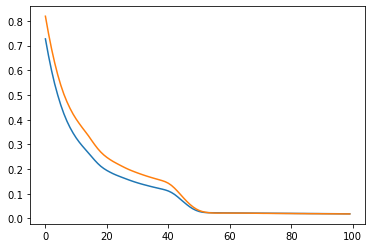

In [93]:
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])

In [95]:
X_predict = np.array([[1, 50, 50000, 10000, 600000]])
X_predict_scaled = scaler_X.transform(X_predict)
X_predict_scaled

array([[1.        , 0.6       , 0.375     , 0.49748744, 0.59183673]])

In [96]:
y_predict_scaled = model.predict(X_predict_scaled)
y_predict_scaled

array([[0.5455147]], dtype=float32)

In [97]:
y_predict = scaler_y.inverse_transform(y_predict_scaled)
y_predict

array([[47731.543]], dtype=float32)